# Visualise Training/Validation data (Bounding box in the images)

To visualise custom VOC-format dataset, we can apply MXNet frameswork APIs

In [20]:
import zipfile as zf
files = zf.ZipFile("VOCPlot.zip", 'r')
files.extractall('')
files.close()

To safe time from processing the whole datasets, few data samples are randomly selected manually from AC,SVHN dataset, and store under "VOCPlot" folder, using VOC2007 format folder. <br>

### Preparing Dataset

### Generate train/validation spliting data (txt)

In Pascal-VOC dataset, training and validation data infomation are stored in a txt file under ImageSet folder, since we only have raw images and xml annotations, we need to generate this txt file

In [21]:
import os  
import random  
  
# create train/validation sets
trainval_percent = 1    # trainval 
train_percent = 1      # train
xmlfilepath = 'VOCPlot/VOC2007/Annotations'
txtsavepath = 'VOCPlot/VOC2007/ImageSets/Main'
total_xml = os.listdir(xmlfilepath)  
  
num=len(total_xml)  
list=range(num)  
tv=int(num*trainval_percent)  
tr=int(tv*train_percent)  
trainval= random.sample(list,tv)  
train=random.sample(trainval,tr)  

# record sets' info in txt files under ImageSets folder
ftrainval = open('VOCPlot/VOC2007/ImageSets/Main/trainval.txt', 'w')  
ftest = open('VOCPlot/VOC2007/ImageSets/Main/test.txt', 'w')  
ftrain = open('VOCPlot/VOC2007/ImageSets/Main/train.txt', 'w')  
fval = open('VOCPlot/VOC2007/ImageSets/Main/val.txt', 'w')  
  
for i  in list:  
    name=total_xml[i][:-4]+'\n'  
    if i in trainval:  
        ftrainval.write(name)  
        if i in train:  
            ftrain.write(name)  
        else:  
            fval.write(name)  
    else:  
        ftest.write(name)  
  
ftrainval.close()  
ftrain.close()  
fval.close()  
ftest .close() 

### Fixing xml  annotations

In MXNest framework modules, custom VOC-format dataset annotations can only have undercase string class name, therefore we need to change original class name "0" to "9", into "zero" to "nine"

In [22]:
import xml.etree.ElementTree as ET
import os

directory = './VOCPlot/VOC2007/Annotations/'

print('fixing...')
for filename in os.listdir(directory):

    if filename.endswith(".xml"):
        tree = ET.parse('./VOCPlot/VOC2007/Annotations/{}'.format(filename))
        root = tree.getroot()

        # fix filename
        name = root.find('filename')
        new_name = filename[:-3]+'jpg'
        name.text = str(new_name)
        name.set('updated', 'yes')

        # change class name
        for name in root.iter('name'):
            if name.text == "0":
                name.text = "zero"
                name.set('updated','yes')
            elif name.text == "1":
                name.text = "one"
                name.set('updated','yes')
            elif name.text == "2":
                name.text = "two"
                name.set('updated','yes')
            elif name.text == "3":
                name.text = "three"
                name.set('updated','yes')
            elif name.text == "4":
                name.text = "four"
                name.set('updated','yes')
            elif name.text == "5":
                name.text = "five"
                name.set('updated','yes')
            elif name.text == "6":
                name.text = "six"
                name.set('updated','yes')
            elif name.text == "7":
                name.text = "seven"
                name.set('updated','yes')
            elif name.text == "8":
                name.text = "eight"
                name.set('updated','yes')
            elif name.text == "9":
                name.text = "nine"
                name.set('updated','yes')        

        tree.write('./VOCPlot/VOC2007/Annotations/{}'.format(filename))

    else:
        print("somthing wrong")
        continue
    # print(filename[:-3])
print("Completed")

fixing...
Completed


In [15]:
pip install gluoncv

     |████████████████████████████████| 1.3 MB 24.4 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/chainer_p36/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install mxnet

     |████████████████████████████████| 46.9 MB 21.8 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/chainer_p36/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


As long as your dataset can match the PASCAL VOC convension, it is convenient to derive custom dataset from VOCDetection using mxnet package

In [26]:
from gluoncv.data import VOCDetection
class VOCLike(VOCDetection):
    CLASSES = ['zero', 'one','two','three','four','five','six','seven','eight','nine']
    def __init__(self, root, splits, transform=None, index_map=None, preload_label=True):
        super(VOCLike, self).__init__(root, splits, transform, index_map, preload_label)

plot_dataset = VOCLike(root='VOCPlot', splits=((2007, 'train'),))

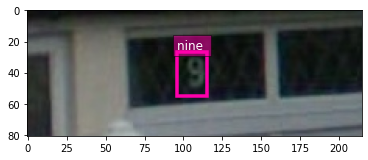

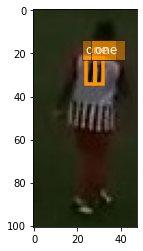

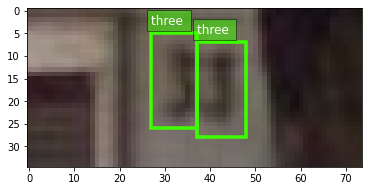

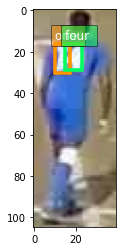

In [30]:
from matplotlib import pyplot as plt
from gluoncv.utils import viz

# visualize 4 data 
for i in range(4):    
    train_image, train_label = plot_dataset[i]
    bboxes = train_label[:, :4]
    cids = train_label[:, 4:5]
    ax = viz.plot_bbox(train_image.asnumpy(), bboxes, labels=cids, class_names=plot_dataset.classes)
    plt.show()